#About Dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

# Data preprocessing

In [ ]:
train_url = 'sample_data/drug200.csv'

In [ ]:
import pandas as pd
train_df_raw = pd.read_csv(train_url)

In [ ]:
train_df_raw

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
sex_to_digit = {
    'M': 0,
    'F': 1
}
LNH_to_digit = {
    'LOW': 0,
    'NORMAL': 1,
    'HIGH': 2
}
drug_to_digit = {
    'drugA': 0,
    'drugB': 1,
    'drugC': 2,
    'drugX': 3,
    'drugY': 4,
}

In [ ]:
age_feature_values = train_df_raw.Age.values
sex_feature_values = [sex_to_digit[x] for x in train_df_raw.Sex.values]
blood_pressure_feature_values = [LNH_to_digit[x] for x in train_df_raw.BP.values]
cholesterol_feature_values = [LNH_to_digit[x] for x in train_df_raw.Cholesterol.values]
Na_to_K_feature_values = train_df_raw.Na_to_K.values
drug_target_values = [drug_to_digit[x] for x in train_df_raw.Drug.values]

df_body = [age_feature_values, sex_feature_values, blood_pressure_feature_values, cholesterol_feature_values, Na_to_K_feature_values, drug_target_values]

train_df = pd.DataFrame(df_body, index=train_df_raw.columns).T

In [ ]:
train_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,1.0,2.0,2.0,25.355,4.0
1,47.0,0.0,0.0,2.0,13.093,2.0
2,47.0,0.0,0.0,2.0,10.114,2.0
3,28.0,1.0,1.0,2.0,7.798,3.0
4,61.0,1.0,0.0,2.0,18.043,4.0
...,...,...,...,...,...,...
195,56.0,1.0,0.0,2.0,11.567,2.0
196,16.0,0.0,0.0,2.0,12.006,2.0
197,52.0,0.0,1.0,2.0,9.894,3.0
198,23.0,0.0,1.0,1.0,14.020,3.0


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    float64
 1   Sex          200 non-null    float64
 2   BP           200 non-null    float64
 3   Cholesterol  200 non-null    float64
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB
None


In [ ]:
train_X = train_df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
train_Y = train_df[['Drug']]

# Dumb learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_clf_default = DecisionTreeClassifier(random_state=45678)
decision_tree_clf_default.fit(train_X, train_Y)

DecisionTreeClassifier(random_state=45678)

In [ ]:
decision_tree_clf_default.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 45678,
 'splitter': 'best'}

In [ ]:
decision_tree_clf_default.get_depth()

4

# Parameters selection

In [ ]:
from sklearn.model_selection import GridSearchCV

decision_tree_clf_gs = DecisionTreeClassifier(random_state=45678)

parameters = {
    'max_depth': range(2, decision_tree_clf_default.get_depth() + 1),
    'min_impurity_decrease': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
}

clf_gs = GridSearchCV(decision_tree_clf_gs, parameters)
clf_gs.fit(train_X, train_Y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=45678),
             param_grid={'max_depth': range(2, 5),
                         'min_impurity_decrease': [0.0, 0.2, 0.4, 0.6, 0.8,
                                                   1.0]})

In [ ]:
clf_gs.best_params_

{'max_depth': 4, 'min_impurity_decrease': 0.0}

# Tree visualization

In [ ]:
decision_tree_clf_best = DecisionTreeClassifier(
    random_state=45678,
    max_depth=4,
    min_impurity_decrease=0.0
)
decision_tree_clf_best.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=4, random_state=45678)

In [ ]:
!apt-get install python-pydot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-pydot


In [ ]:
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus

def jupyter_graphviz(model, feature_names, class_names, **kwargs):
    dot_data = StringIO()
    export_graphviz(model, dot_data, **kwargs, feature_names=feature_names, class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))

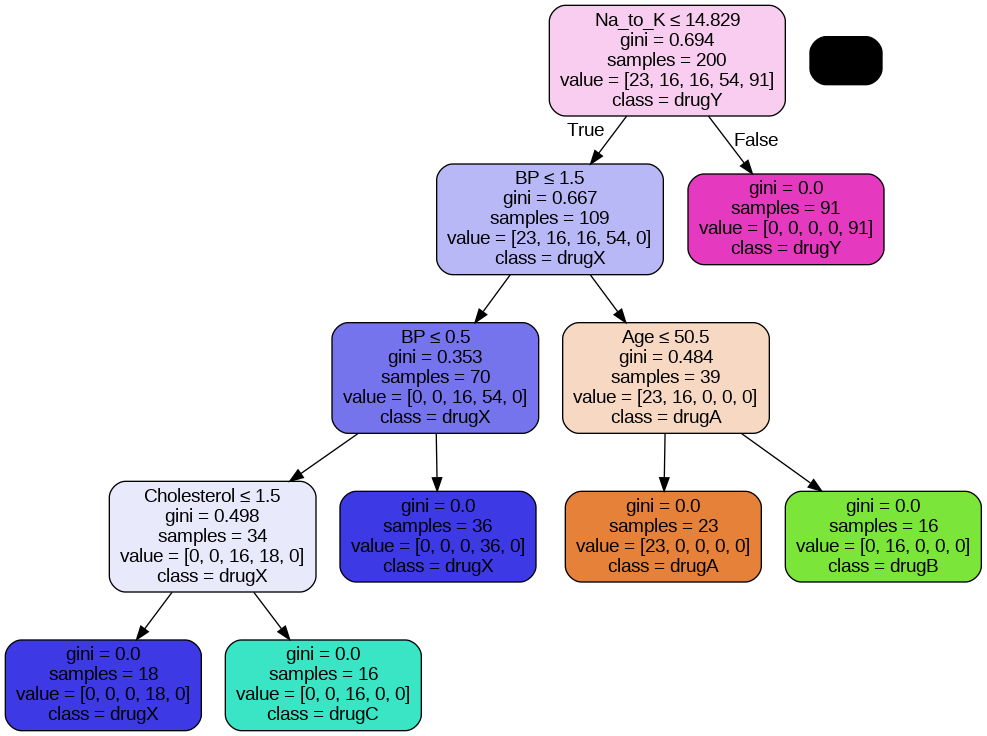

In [ ]:
jupyter_graphviz(
    decision_tree_clf_best,
    feature_names=train_df_raw.columns.drop('Drug'),
    class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
    filled=True,
    rounded=True,
    special_characters=True
)

# accuracy_score tree

In [ ]:
from sklearn.metrics import accuracy_score

y_true = train_Y.Drug.values
y_pred = decision_tree_clf_best.predict(train_X)

print(accuracy_score(y_true, y_pred))

1.0


# Datalog

In [ ]:
!pip install pyDatalog

In [ ]:
from pyDatalog import pyDatalog

In [ ]:
pyDatalog.create_terms('X, Y, Na_to_K, BP, Age, Cholesterol, label')

In [ ]:
#drug_to_digit = {
#    'drugA': 0,
#    'drugB': 1,
#    'drugC': 2,
#    'drugX': 3,
#    'drugY': 4,
#}
(label[X] == 0) <= ((Na_to_K[X] <= 14.829) & (BP[X] > 1.5) & (Age[X] <= 50.5)) # drugA: label = 0
(label[X] == 1) <= ((Na_to_K[X] <= 14.829) & (BP[X] > 1.5) & (Age[X] > 50.5)) # drugB: label = 1
(label[X] == 2) <= ((Na_to_K[X] <= 14.829) & (BP[X] <= 1.5) & (BP[X] <= 0.5) & (Cholesterol[X] > 1.5)) # drugC: label = 2
(label[X] == 3) <= ((Na_to_K[X] <= 14.829) & (BP[X] <= 1.5) & (BP[X] > 0.5)) # drugX: label = 3
(label[X] == 3) <= ((Na_to_K[X] <= 14.829) & (BP[X] <= 1.5) & (BP[X] <= 0.5) & (Cholesterol[X] <= 1.5)) # drugX: label = 3
(label[X] == 4) <= ((Na_to_K[X] > 14.829)) # drugY: label = 4

label[1]==(*,X,'4') <= Na_to_K[1]>(*,X,'14.829')

In [ ]:
#Age	Sex	BP	Cholesterol	Na_to_K	Drug
#23.0	1.0	2.0	2.0       	25.355	4.0
#47.0	0.0	0.0	2.0	        13.093	2.0
Na_to_K['first'] = 13.093
BP['first'] = 0.0
Age['first'] = 47.0
Cholesterol['first'] = 2.0

In [ ]:
foo = label['first'] == Y

## Obtain prediction result

In [ ]:
foo

[(2,)]

In [ ]:
print(foo)

Y
-
2


In [ ]:
foo[0][0]

2

## Predict with datalog and calculate accuracy

In [ ]:
datalog_preds = []
for index, row in train_X.iterrows():
  Na_to_K[index] = row.Na_to_K
  BP[index] = row.BP
  Age[index] = row.Age
  Cholesterol[index] = row.Cholesterol
  pred = (label[index] == Y)
  datalog_preds.append(pred[0][0])

/usr/local/lib/python3.10/dist-packages/pyDatalog/pyParser.py:693: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self._data = literal.lua.ask()


In [ ]:
# notice that: y_true = train_Y.Drug.values
print(accuracy_score(y_true, datalog_preds))

1.0


accuracy score of datalog model matches with tree model